<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# Template Matching (Vorlagenabgleich)

### Vollbild

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

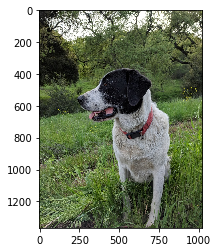

In [3]:
plt.imshow(full)

### Template (Vorlagenbild)

Eine Teilmenge des Bildes. In diesem Fall ist es ein Teil des exakt gleichen Bildes. Später werden wir fortschrittlichere Methoden für allgemeine Vergleiche betrachten, zum Beispiel bei der Gesichtserkennung (facial recognition).

In [4]:
face= cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

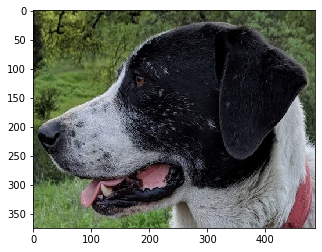

In [5]:
plt.imshow(face)

# Methoden zum Abgleich mit Templates

Zur Erklärung der verschiedenen Methoden stelle bitte sicher, dass du das Video angesehen hast!

-------
-------

**Ein schneller Hinweis zur Funktion *eval()*, falls du sie vorher noch nicht gesehen hast!**

In [6]:
sum([1,2,3])

6

In [7]:
mystring = 'sum'

In [8]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [9]:
myfunc = eval(mystring)

In [10]:
myfunc([1,2,3])

6

--------
--------

In [11]:
height, width,channels = face.shape

In [12]:
width

486

In [13]:
height

375

In [14]:
# Das Vollbild zum Durchsuchen
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# Die Template zum Abgleichen
face= cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# Alle 6 Vergleichsmethoden in einer Liste
# Beachte, dass wir Strings verwenden, später verwenden wir die eval() Funktion zur Konvertierung in eine Funktion
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

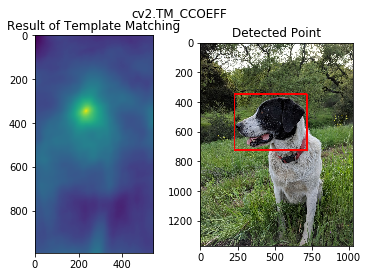

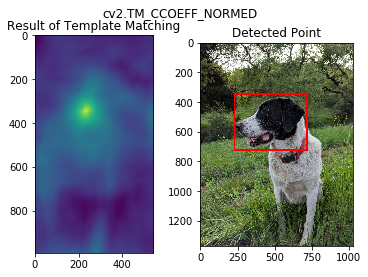

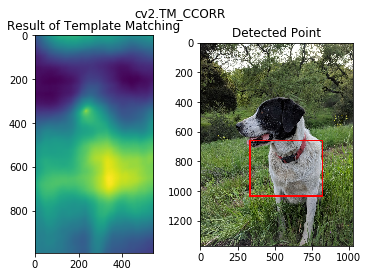

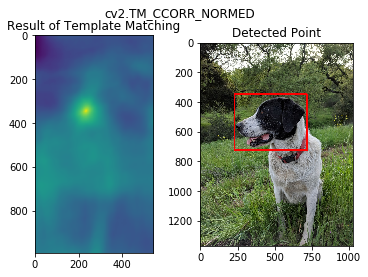

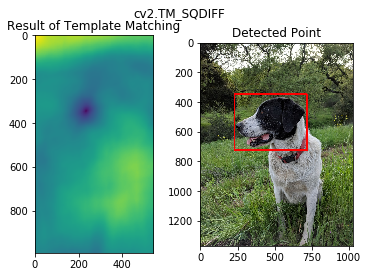

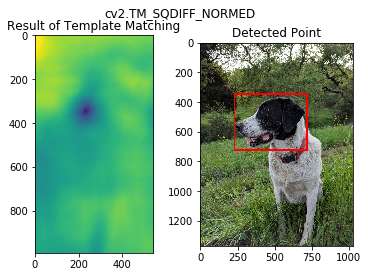

In [15]:
for m in methods:
    
    # Erzeuge eine Kopie des Bildes
    full_copy = full.copy()
    
    # Verwende die zugrundeliegende Funktion anstelle des Strings
    method = eval(m)

    # Wende das Template Matching mit der Methode an
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Speichere minimale und maximale Werte und deren Position
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Bereite das Zeichnen eines Rechtecks vor
    
    # Verwende für die Methoden TM_SQDIFF und TM_SQDIFF_NORMED das Minimum
    # Beachte die Färbung der letzten 2 Bilder auf der linken Seite.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Speichere die untere, rechte Ecke des Rechtecks
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Zeichne das rote Rechteck
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Zeige die Bilder an
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    